<a href="https://colab.research.google.com/github/zhangou888/NN/blob/main/Noise_Detection_Model_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔍 Noise Detection and Model Comparison
This notebook:
- Creates a noisy, imbalanced dataset
- Evaluates Logistic Regression, Random Forest, and XGBoost
- Uses permutation importance and visualizes results

In [1]:
!pip install xgboost --quiet

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.inspection import permutation_importance

In [3]:
# Step 1: Generate noisy, imbalanced data
X, y = make_classification(
    n_samples=1000, n_features=20,
    n_informative=5, n_redundant=5,
    weights=[0.7, 0.3], flip_y=0.2, class_sep=0.8, random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [4]:
# Step 2: Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
perm_lr = permutation_importance(lr, X_test, y_test, n_repeats=10, random_state=42)

In [5]:
# Step 3: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

In [6]:
# Step 4: XGBoost
xgb = XGBClassifier(n_estimators=100, max_depth=5, scale_pos_weight=0.7/0.3,
                    use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])

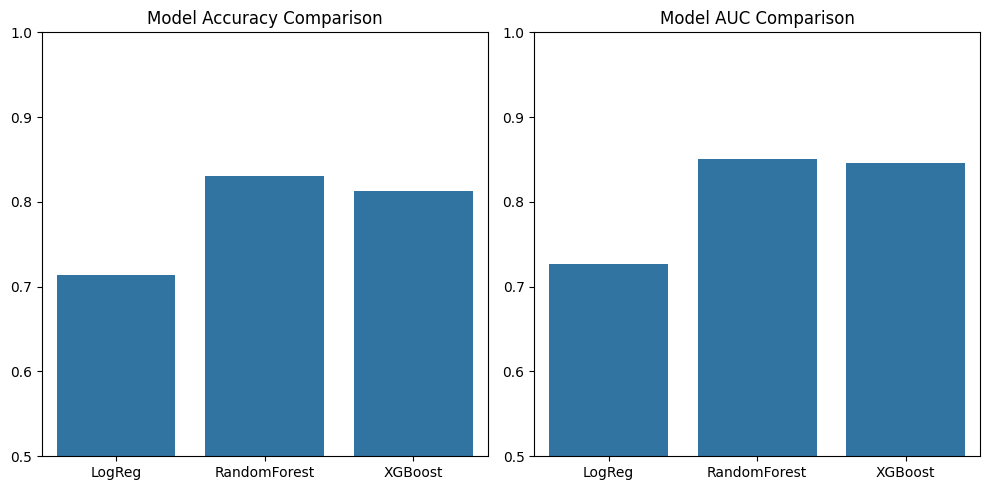

In [7]:
# Step 5: Visualize Accuracy and AUC
models = ['LogReg', 'RandomForest', 'XGBoost']
accuracy = [acc_lr, acc_rf, acc_xgb]
auc = [auc_lr, auc_rf, auc_xgb]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=models, y=accuracy)
plt.title("Model Accuracy Comparison")
plt.ylim(0.5, 1.0)
plt.subplot(1, 2, 2)
sns.barplot(x=models, y=auc)
plt.title("Model AUC Comparison")
plt.ylim(0.5, 1.0)
plt.tight_layout()
plt.show()

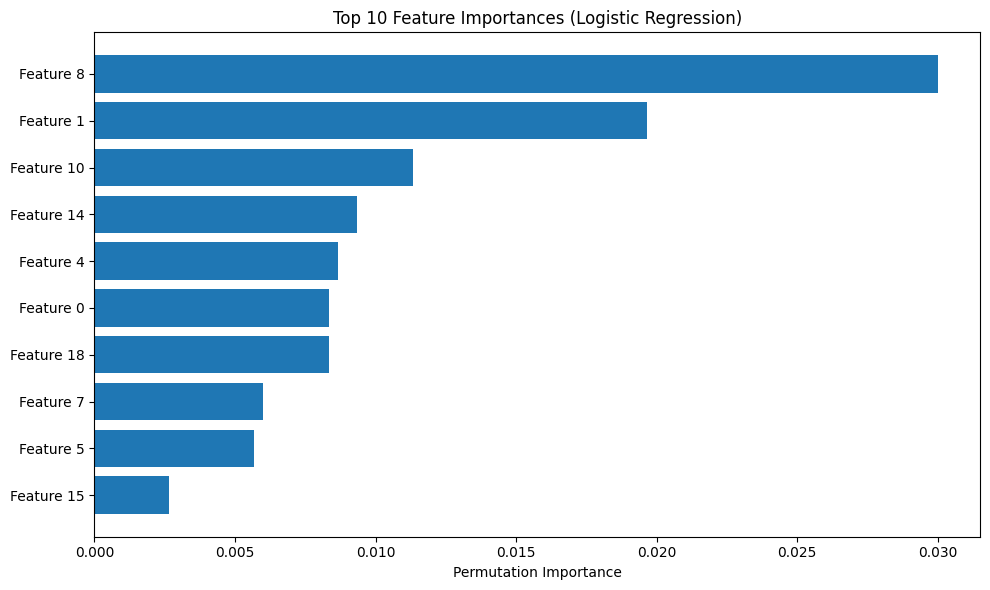

In [8]:
# Step 6: Visualize Permutation Importance for Logistic Regression
plt.figure(figsize=(10, 6))
sorted_idx = perm_lr.importances_mean.argsort()[::-1][:10]
plt.barh(range(10), perm_lr.importances_mean[sorted_idx])
plt.yticks(range(10), [f"Feature {i}" for i in sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Top 10 Feature Importances (Logistic Regression)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()